In [33]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [34]:
# Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Lendo base de dados

df = pd.read_csv('Salary Dataset.csv')
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [3]:
# Informações do DataSet e checando valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [4]:
df.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [5]:
# Checando valores duplicados

df.duplicated().sum()

0

In [6]:
# Verificando valores unicos dos cargos

df["Job Title"].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [7]:
# Verificando quantidade de companhias

df["Company Name"].nunique()

2529

In [8]:
# Verificando localizações existentes

df["Location"].unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

In [9]:
# Tratando valores faltantes

df = df[df['Company Name'].notna()]
df = df[df['Salaries Reported'].notna()]
df.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [10]:
# Renomeando colunas para o português

Renomear = {
    'Company Name' : 'Companhia',
    'Job Title' : 'Cargo',
    'Salaries Reported' : 'Salarios Reportados',
    'Location' : 'Localizacao',
    'Salary' : 'Salario'
}

df = df.rename(columns = Renomear)
df.head()

,Companhia,Cargo,Salarios Reportados,Localizacao,Salario
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [11]:
# Verificando as moedas dos salários

temp = df['Salario'].str.slice(0, 1)
temp.value_counts()

₹    4313
$      19
£       6
A       1
Name: Salario, dtype: int64

In [12]:
# Verificando a frequência do salário

temp2 = df['Salario'].str.split('/', 1, expand = True)[1]
temp2.unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [24]:
# Separando a moeda do resto do salário

df['Moeda'] = temp

def salario_temp(valor):
    valor = valor.replace('₹', '').replace('$', '').replace('£', '').replace('A', '').replace(',', '').replace('FN ', '')
    return valor

df['Salario'] = df['Salario'].apply(salario_temp)

df.head()

,Companhia,Cargo,Salarios Reportados,Localizacao,Salario,Moeda
0,Mu Sigma,Data Scientist,105.0,Bangalore,648573/yr,₹
1,IBM,Data Scientist,95.0,Bangalore,1191950/yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,836874/yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,669578/yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,944110/yr,₹


In [25]:
# Convertendo todo o salário para frequência anual

def value_to_float(x):
    if '/yr' in x:
        if len(x) > 1:
            return float(x.replace('/yr', '')) * 1
        return 1.0
    if '/mo' in x:
        if len(x) > 1:
            return float(x.replace('/mo', '')) * 12
        return 12.0
    if '/hr' in x:
        if len(x) > 1:
            return float(x.replace('/hr', '')) * 2085.716
        return 2085.716

df['Salario'] = df['Salario'].apply(value_to_float)
df.head()

,Companhia,Cargo,Salarios Reportados,Localizacao,Salario,Moeda
0,Mu Sigma,Data Scientist,105.0,Bangalore,648573.0,₹
1,IBM,Data Scientist,95.0,Bangalore,1191950.0,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,836874.0,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,669578.0,₹
4,Accenture,Data Scientist,32.0,Bangalore,944110.0,₹


In [26]:
# Descrevendo informações a respeito do salário anual

df['Salario'].describe()

count    4.339000e+03
mean     9.156269e+05
std      8.591563e+05
min      1.081400e+04
25%      4.171790e+05
50%      7.034180e+05
75%      1.188461e+06
max      1.880795e+07
Name: Salario, dtype: float64

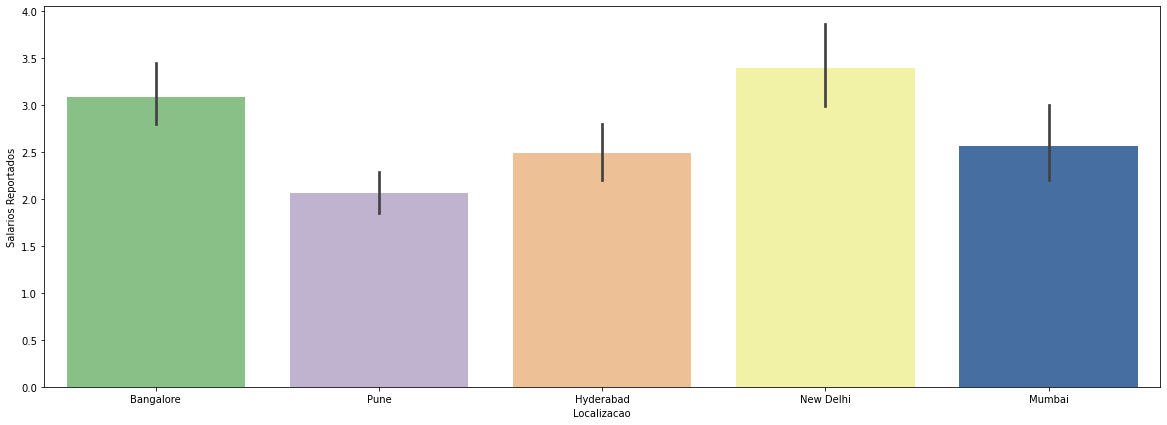

In [27]:
# Plotagem de barras da Localização vs. Salários Reportados

plt.figure(figsize = (20, 7))
sns.barplot(x = df["Localizacao"], y = df["Salarios Reportados"], palette = "Accent");

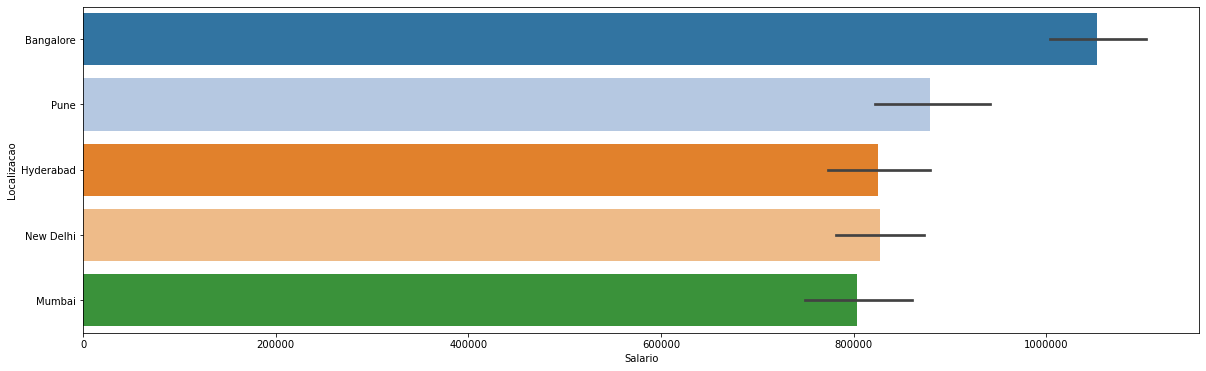

In [29]:
# Plotagem de gráfico de barras do Salário vs. Localização

plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = df["Salario"], y = df["Localizacao"], palette = "tab20");

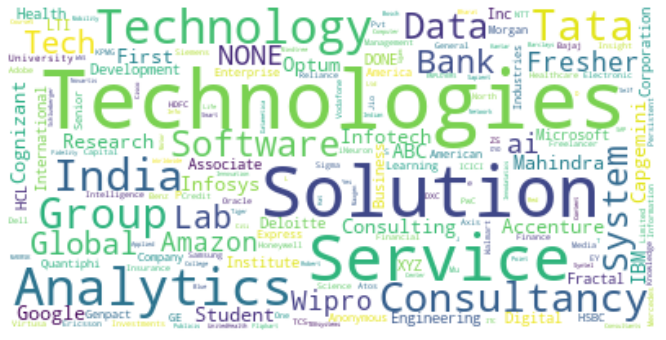

In [35]:
# Word Cloud das palavras existentes nos nomes das companhias

texto = " ".join(Company for Company in df["Companhia"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(texto)
plt.figure(figsize = (20, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

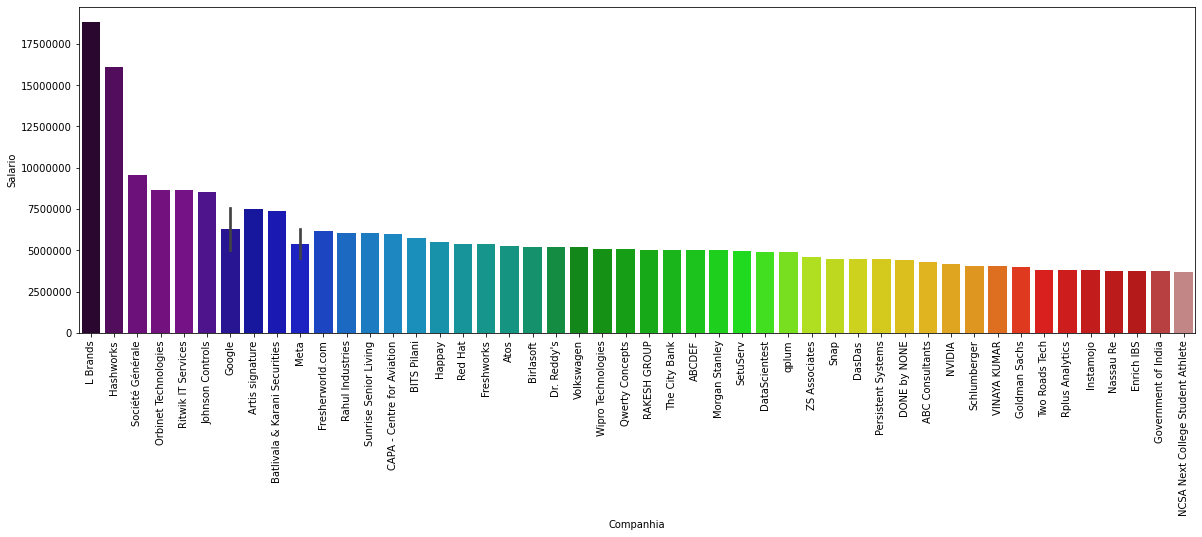

In [36]:
#Gráfico da companhia vs. Salário

plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salario", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Companhia"][:50], y = df["Salario"][:50], palette = "nipy_spectral");

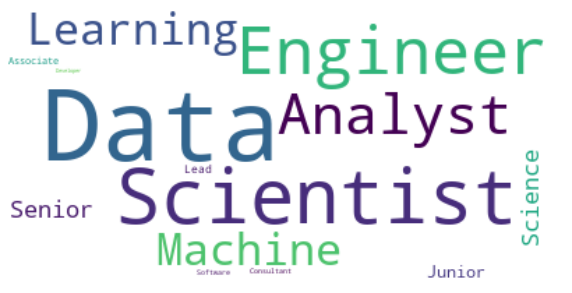

In [37]:
# Word Cloud das palavras existentes nos cargos

texto = " ".join(Companhia for Companhia in df["Cargo"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(texto)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

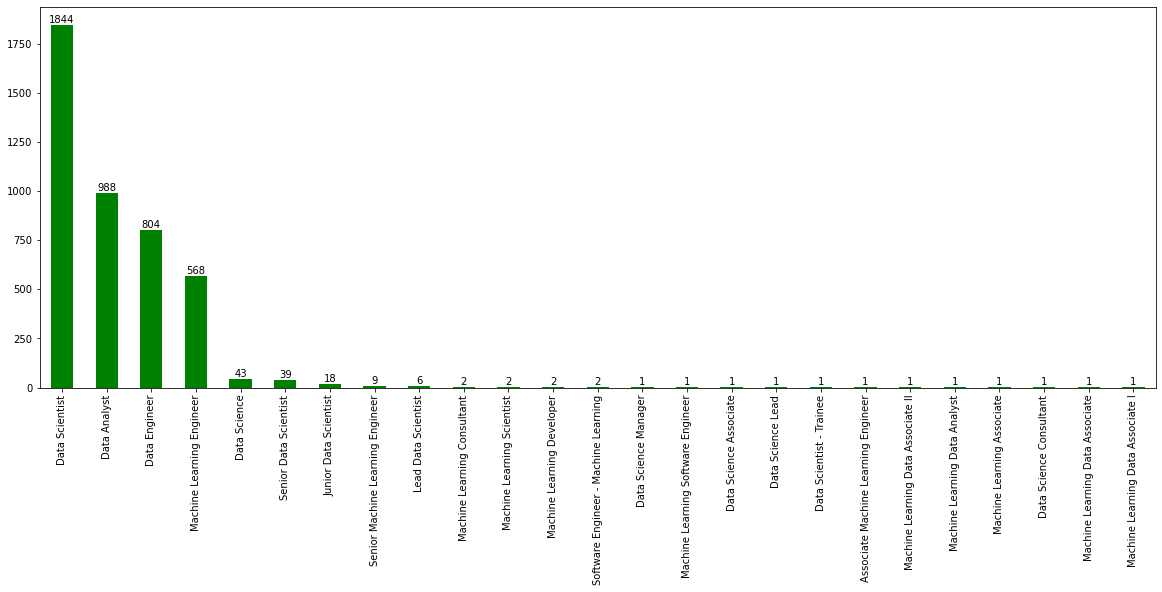

In [40]:
# Gráfico de diferentes tipos de cargos

plt.figure(figsize = (20, 7))
ax = df["Cargo"].value_counts().plot(kind = 'bar', color = "green")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

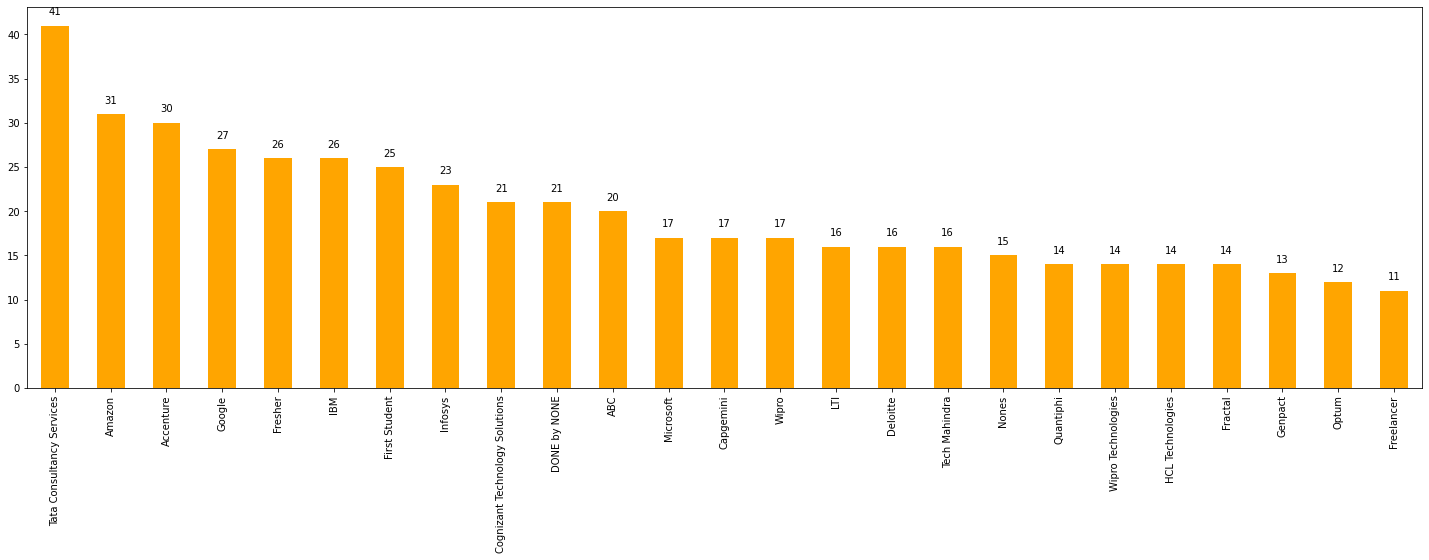

In [41]:
# 25 companhias que mais aparecem no dataset

plt.figure(figsize = (25, 7))
ax = df["Companhia"].value_counts()[:25].plot(kind = 'bar', color = "orange")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

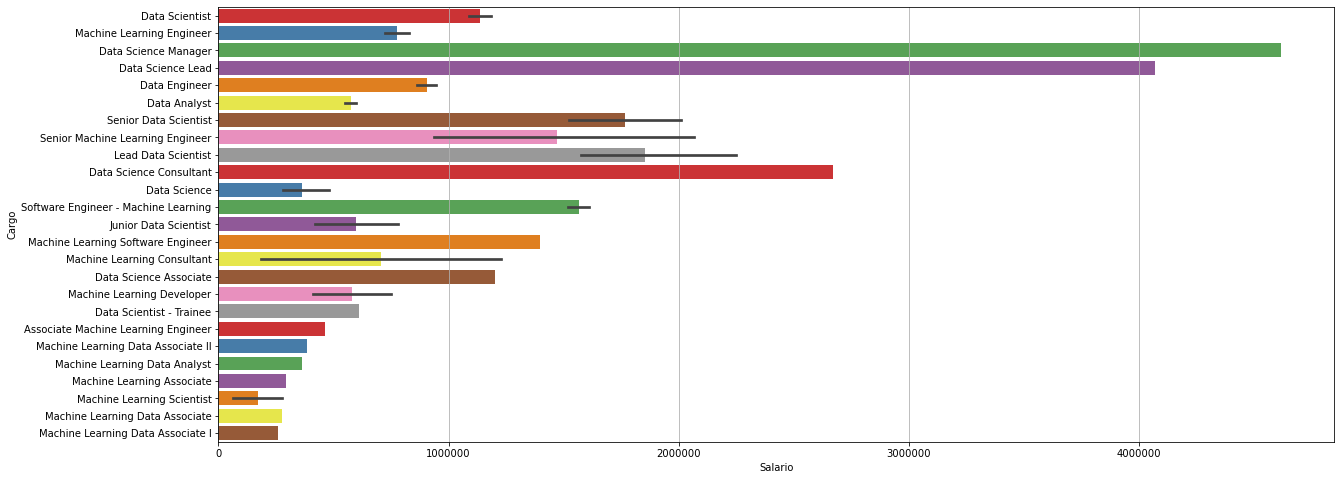

In [42]:
# Gráfico do Salário vs Cargo

plt.figure(figsize = (20, 8))
plt.grid()
plt.ticklabel_format(style = 'plain')
df.sort_values("Salario", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Salario"], y = df["Cargo"], palette = "Set1");